In [1]:
import cv2
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
protoPath = os.path.join('hed_model', 'deploy.prototxt')
modelPath = os.path.join('hed_model', 'hed_pretrained_bsds.caffemodel')

net = cv2.dnn.readNetFromCaffe(protoPath, modelPath)

In [3]:
class CropLayer(object):
    def __init__(self, params, blobs):
        # initialize our starting and ending (x, y) coordinate of
        # the crop
        self.startX = 0
        self.startY = 0
        self.endX = 0
        self.endY = 0

    def getMemoryShapes(self, inputs):
        (inputShape, targetShape) = (inputs[0], inputs[1])
        (batchSize, numChannels) = (inputShape[0], inputShape[1])
        (H, W) = (targetShape[2], targetShape[3])

        # compute the starting and ending crop coordinates
        self.startX = int((inputShape[3] - targetShape[3]) / 2)
        self.startY = int((inputShape[2] - targetShape[2]) / 2)
        self.endX = self.startX + W
        self.endY = self.startY + H

        return [[batchSize, numChannels, H, W]]

    def forward(self, inputs):
        return [inputs[0][:, :, self.startY:self.endY,
        self.startX:self.endX]]

In [4]:
cv2.dnn_registerLayer("Crop", CropLayer)

In [5]:
img = cv2.imread('8027274.372160.jpg')

In [6]:
(H, W) = img.shape[:2]

print((H, W))

(102, 136)


In [7]:
blob = cv2.dnn.blobFromImage(img, 
                             scalefactor=1.0, 
                             size=(W, H),
                             mean=(104.00698793, 116.66876762, 122.67891434),
                             swapRB=False, crop=False)

In [8]:
# set the blob as input to the network and perform a forward pass
net.setInput(blob)
hed = net.forward()
hed = cv2.resize(hed[0, 0], (W, H))
hed = (255*hed).astype("uint8")

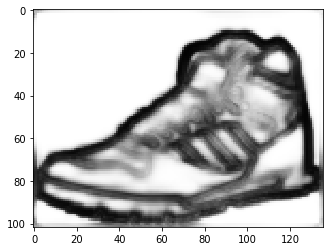

In [9]:
hed_rgb_img = cv2.cvtColor(hed, cv2.COLOR_BGR2RGB)
hed_rgb_img = (255 - hed_rgb_img)

plt.imshow(hed_rgb_img)
plt.show();

In [10]:
img.shape

(102, 136, 3)

In [11]:
hed_rgb_img.shape

(102, 136, 3)

In [12]:
import numpy as np

In [13]:
output = np.hstack((hed_rgb_img, img))

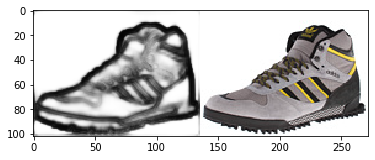

In [14]:
plt.imshow(output)
plt.show()

In [15]:
print(hed_rgb_img.shape)
print(img.shape)

(102, 136, 3)
(102, 136, 3)


In [17]:
output.shape

(102, 272, 3)

In [18]:
train_img_path = os.path.join('edges2shoes', 'train', '1_AB.jpg')

In [19]:
img_train = cv2.imread(train_img_path)

In [20]:
img_train.shape

(256, 512, 3)

In [21]:
train_img_path = os.path.join('edges2shoes', 'train', '127_AB.jpg')
img_train = cv2.imread(train_img_path)
img_train.shape

(256, 512, 3)